In [1]:
from math import ceil
import os
import json as json
import numpy as np
from tqdm import tqdm

from tenso.prototypes.heom import spin_boson #Spin-boson helper function
from tenso.prototypes.bath import gen_bcf #Bath correlation function generator
import matplotlib.pyplot as plt

In [15]:
out_tree = 'tree2' #Output directory
out_name = 'train' #Output name

outs = {
    'tree2': out_tree,
    'train': out_name
}


In [12]:
bath_simulation = gen_bcf(
    re_d=[540],    #Reorganization energy in cm-1
    width_d=[70],  #Width of the DL spectral density in cm-1
    freq_b=[1243], # Central Frequency of the Brownian Spectral density in cm-1
    re_b=[161.6], #Reorganization energy of the Brownian Spectral density in cm-1
    width_b=[10],  #Width of the spectral density in cm-1
    temperature=300, #Temperature in Kelvin
    decomposition_method='Pade', #Decomposition method for the bath correlation function
    n_ltc=1, #Number of low-temperature correction terms
)

In [13]:
H = np.array([[1500/2, 600/2], [600/2, -1500/2]], dtype=np.complex128)

# Diagonalization
evals, U = np.linalg.eigh(H)
id_max = np.argmax(evals)

end_time = 1000.0 #fs
dt = 1
wfn = U[:, 1] #np.array([1.0, 0.0], dtype=np.complex128)

In [16]:
for out in outs:
    propagator = spin_boson(
        fname=out,
        init_rdo=np.outer(wfn, wfn.conj()),
        sys_ham=np.array([[1500/2, 600/2], [600/2, -1500/2]], dtype=np.complex128),
        sys_op=np.array([[0.5, 0.0], [0.0, -0.5]], dtype=np.complex128),
        bath_correlation=bath_simulation,
        dim=5,
        end_time=end_time,
        step_time=dt,
        frame_method=out,
    )
    progress_bar = tqdm(propagator, total=ceil(end_time / dt))

    for _t in (progress_bar):
        progress_bar.set_description(f'@{_t:.2f} fs')

  0%|          | 0/1000 [00:00<?, ?it/s]

{'dim': 5, 'end_time': 1000.0, 'step_time': 1, 'frame_method': 'tree2'}
{'auxiliary_ps_method': 'ps2', 'auxiliary_step_time': None, 'cache_svd_info': True, 'dim': 5, 'dvr_length': 32, 'dvr_type': 'sine', 'end_time': 1000.0, 'frame_method': 'tree2', 'load_checkpoint_from_file': False, 'max_auxiliary_rank': 32, 'max_auxiliary_steps': None, 'metric': 're', 'ode_atol': 1e-07, 'ode_method': 'dopri5', 'ode_rtol': 1e-05, 'ps2_atol': 1e-07, 'ps2_ratio': 2.0, 'ps_method': 'vmf', 'rank': 3, 'renormalize': False, 'save_checkpoint_to_file': True, 'start_time': 0.0, 'step_time': 1, 'stepwise_method': 'mix', 'use_dvr': False, 'visualize_frame': False, 'vmf_atol': 1e-07, 'vmf_reg_method': 'extend', 'vmf_reg_type': 'ip'}
For k=0: s:0.22307229 | e:0.00000000 | a:-0.03780000 | f:0.47230529 | f^2:0.22307229
For k=1: s:0.10095920 | e:0.10044090 | a:0.00002494 | f:-0.31774078 | f^2:0.10095920
For k=2: s:0.10095920 | e:-0.10044090 | a:-0.00002494 | f:0.31774078 | f^2:0.10095920
For k=3: s:0.04791662 | e:0.0

@1000.00 fs: : 1001it [03:36,  4.62it/s]                        
  0%|          | 0/1000 [00:00<?, ?it/s]

{'dim': 5, 'end_time': 1000.0, 'step_time': 1, 'frame_method': 'train'}
{'auxiliary_ps_method': 'ps2', 'auxiliary_step_time': None, 'cache_svd_info': True, 'dim': 5, 'dvr_length': 32, 'dvr_type': 'sine', 'end_time': 1000.0, 'frame_method': 'train', 'load_checkpoint_from_file': False, 'max_auxiliary_rank': 32, 'max_auxiliary_steps': None, 'metric': 're', 'ode_atol': 1e-07, 'ode_method': 'dopri5', 'ode_rtol': 1e-05, 'ps2_atol': 1e-07, 'ps2_ratio': 2.0, 'ps_method': 'vmf', 'rank': 3, 'renormalize': False, 'save_checkpoint_to_file': True, 'start_time': 0.0, 'step_time': 1, 'stepwise_method': 'mix', 'use_dvr': False, 'visualize_frame': False, 'vmf_atol': 1e-07, 'vmf_reg_method': 'extend', 'vmf_reg_type': 'ip'}
For k=0: s:0.22307229 | e:0.00000000 | a:-0.03780000 | f:0.47230529 | f^2:0.22307229
For k=1: s:0.10095920 | e:0.10044090 | a:0.00002494 | f:-0.31774078 | f^2:0.10095920
For k=2: s:0.10095920 | e:-0.10044090 | a:-0.00002494 | f:0.31774078 | f^2:0.10095920
For k=3: s:0.04791662 | e:0.0

@1000.00 fs: : 1001it [02:23,  6.95it/s]                        


/var/folders/_3/vb4hn5kx53qdsd55_fkc4lhm0000gn/T/ipykernel_97356/2944929660.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=(0,0,1,0.88))


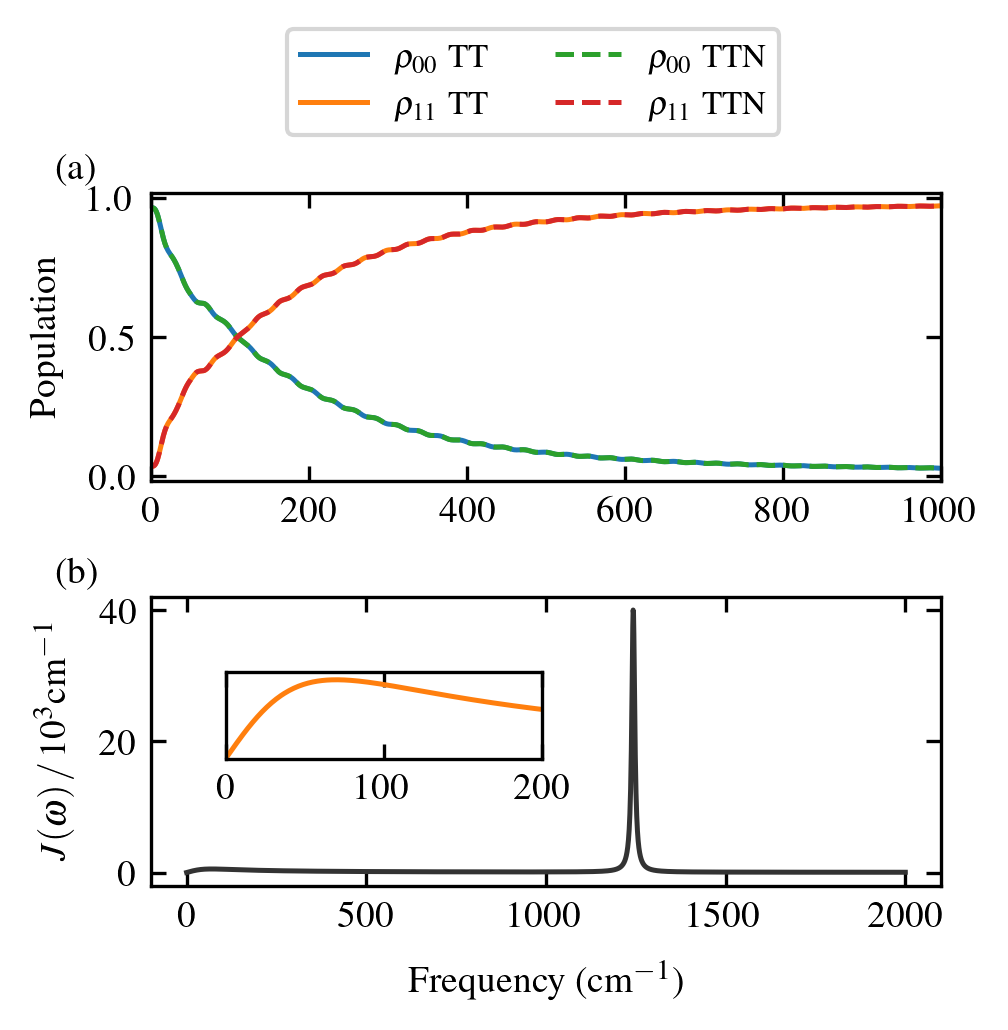

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# -------------------- EDITA ESTO --------------------
file_sb = Path("train.dat.log")  # tu archivo de poblaciones SB
time_units = "fs"
pop_labels = [r"$\rho_{00}$TT", r"$\rho_{11}$TT"]

file_sb2 = Path("tree2.dat.log")
time_units = "fs"
pop_labels2 = [r"$\rho_{00}Tree$", r"$\rho_{11}$Tree"]


# Drude–Lorentz params (cm⁻¹)
re_d    = [540]
width_d = [70]
# Underdamped Brownian params (cm⁻¹)
freq_b  = [1243]
re_b    = [161.6]
width_b = [10]
# --------------------------------------------------

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif", "font.serif": ["Times"], "font.size": 9,
    "axes.labelsize": 9, "axes.titlesize": 9, "axes.linewidth": 0.8,
    "lines.linewidth": 1.2, "lines.markersize": 4,
    "xtick.direction": "in", "ytick.direction": "in",
    "xtick.top": True, "ytick.right": True,
    "figure.dpi": 300,
})

def load_spinboson_pops(fname, convert_to_ps=False):
    arr = np.genfromtxt(fname, dtype=complex, comments="#", skip_header=1)
    t = arr[:,0].real
    if convert_to_ps:
        t *= 1e-3
    pops = np.vstack((arr[:,1].real, arr[:,4].real)).T
    return t, pops

def drude_sd(omega, re_d, width_d):
    J = np.zeros_like(omega)
    for lam, gamma in zip(re_d, width_d):
        J += 2*lam*gamma*omega/(omega**2 + gamma**2)
    return J

def brownian_sd(omega, re_b, freq_b, width_b):
    J = np.zeros_like(omega)
    for lam, w0, gamma in zip(re_b, freq_b, width_b):
        J += 2*lam*w0**2*gamma*omega/((w0**2 - omega**2)**2 + (gamma*omega)**2)
    return J

# load data
convert = (time_units.lower() == "ps")
t_sb, p_sb = load_spinboson_pops(file_sb, convert_to_ps=convert)
t_sb2, p_sb2 = load_spinboson_pops(file_sb2, convert_to_ps=convert)

# build spectral densities
omega = np.linspace(0, 2000, 2000)
J_dl = drude_sd(omega, re_d, width_d)
J_bo = brownian_sd(omega, re_b, freq_b, width_b)
J_tot = J_dl + J_bo

# make figure
fig, (ax1, ax2) = plt.subplots(
    2,1, figsize=(3.4, 3.0), gridspec_kw={"hspace":0.4}
)

# --- (a) populations ---
ax1.plot(t_sb, p_sb[:,0], label=r"$\rho_{00}$ TT")
ax1.plot(t_sb, p_sb[:,1], label=r"$\rho_{11}$ TT")

ax1.plot(t_sb2, p_sb2[:,0],'--', label=r"$\rho_{00}$ TTN")
ax1.plot(t_sb2, p_sb2[:,1], '--', label=r"$\rho_{11}$ TTN")

ax1.set_ylabel("Population", labelpad=6)
#ax1.set_title(r"Spin--Boson Populations", pad=6)
ax1.set_xlim(0, 1000)
ax1.text(-0.12,1.02,"(a)", transform=ax1.transAxes,
         fontsize=9, va="bottom")

# common legend for populations
handles, labs = ax1.get_legend_handles_labels()
fig.legend(handles, labs, loc="upper center",
           ncol=2, bbox_to_anchor=(0.5,1.08), fontsize=8)

# --- (b) total spectral density ---
ax2.plot(omega, J_tot/1000, color="0.2", label=r"$J(\omega)$")
ax2.set_ylabel(r"$J(\omega)\,/\,10^3\mathrm{cm}^{-1}$", labelpad=6)
ax2.set_xlabel(r"Frequency (cm$^{-1}$)", labelpad=6)
#ax2.set_title("Spectral density", pad=6)
ax2.text(-0.12,1.02,"(b)", transform=ax2.transAxes,
         fontsize=9, va="bottom")

# --- inset: zoom DL part ---
axins = inset_axes(ax2, width="40%", height="30%", loc="upper left", borderpad=2)
axins.plot(omega, J_dl, color="C1", linewidth=1.2)
axins.set_xlim(0, 200)
axins.set_ylim(0, J_dl[omega<=200].max()*1.1)
axins.set_xticks([0,100,200])
axins.set_yticks([])
#axins.set_title(r"Drude--Lorentz", fontsize=7, pad=3)
#mark_inset(ax2, axins, loc1=2, loc2=4, fc="none", ec="0.5")

fig.tight_layout(rect=(0,0,1,0.88))
plt.savefig("SpinBoson_populations.png", bbox_inches='tight', dpi=300, transparent=True)
plt.show()